In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('InterBankCallRate_cleaned.csv')
data.head()

,Year,Month,InterBankCallRate,MPR,TreasuryBill,SavingsDeposit,OneMonthDeposit,ThreeMonthsDeposit,SixMonthsDeposit,TwelveMonthsDeposit,PrimeLending,MaxLending
0,2024,1,16.43,18.75,4.33,5.28,7.49,9.26,8.29,9.93,13.82,27.07
1,2024,2,19.25,22.75,17.03,5.86,8.69,9.89,9.61,10.75,15.06,26.55
2,2024,3,27.95,24.75,16.53,6.28,9.90,10.90,10.54,11.04,15.70,29.38
3,2024,4,29.88,24.75,16.24,6.29,10.68,11.65,11.74,11.23,15.54,29.49
4,2023,1,10.35,17.50,1.39,4.29,8.18,8.76,7.35,7.79,13.67,27.63


In [3]:
data.shape

(219, 12)

In [4]:
data.describe()

,Year,Month,InterBankCallRate,MPR,TreasuryBill,SavingsDeposit,OneMonthDeposit,ThreeMonthsDeposit,SixMonthsDeposit,TwelveMonthsDeposit,PrimeLending,MaxLending
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,2014.652968,6.401826,11.497626,11.396119,7.891918,3.083699,7.750274,8.405845,8.498311,8.225434,15.903744,25.435753
std,5.311242,3.460550,7.966720,4.155561,4.191940,1.120864,2.708426,2.483944,2.656330,2.569898,2.011644,4.151833
min,2006.000000,1.000000,0.000000,0.000000,0.000000,1.250000,1.640000,2.740000,2.650000,3.530000,11.130000,17.170000
25%,2010.000000,3.000000,7.235000,9.750000,4.060000,1.910000,6.525000,6.905000,6.460000,6.040000,15.065000,22.490000
50%,2015.000000,6.000000,10.510000,12.000000,8.270000,3.260000,8.190000,8.850000,9.110000,8.080000,16.530000,26.330000
75%,2019.000000,9.000000,14.185000,13.500000,10.910000,3.930000,9.090000,9.960000,10.315000,10.265000,17.080000,28.545000
max,2024.000000,12.000000,64.580000,24.750000,17.030000,6.290000,15.010000,14.650000,15.840000,16.470000,19.660000,31.560000


In [5]:
# Convert Year and Month to a datetime object for proper plotting over time
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

In [6]:
data.head()

,Year,Month,InterBankCallRate,MPR,TreasuryBill,SavingsDeposit,OneMonthDeposit,ThreeMonthsDeposit,SixMonthsDeposit,TwelveMonthsDeposit,PrimeLending,MaxLending,Date
0,2024,1,16.43,18.75,4.33,5.28,7.49,9.26,8.29,9.93,13.82,27.07,2024-01-01
1,2024,2,19.25,22.75,17.03,5.86,8.69,9.89,9.61,10.75,15.06,26.55,2024-02-01
2,2024,3,27.95,24.75,16.53,6.28,9.90,10.90,10.54,11.04,15.70,29.38,2024-03-01
3,2024,4,29.88,24.75,16.24,6.29,10.68,11.65,11.74,11.23,15.54,29.49,2024-04-01
4,2023,1,10.35,17.50,1.39,4.29,8.18,8.76,7.35,7.79,13.67,27.63,2023-01-01


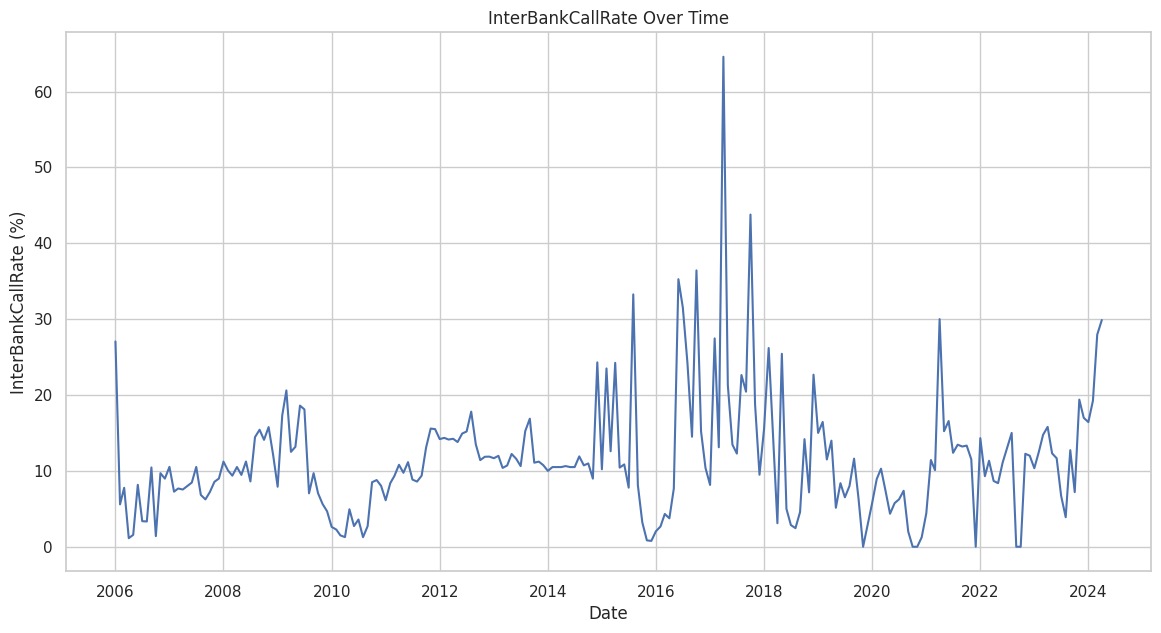

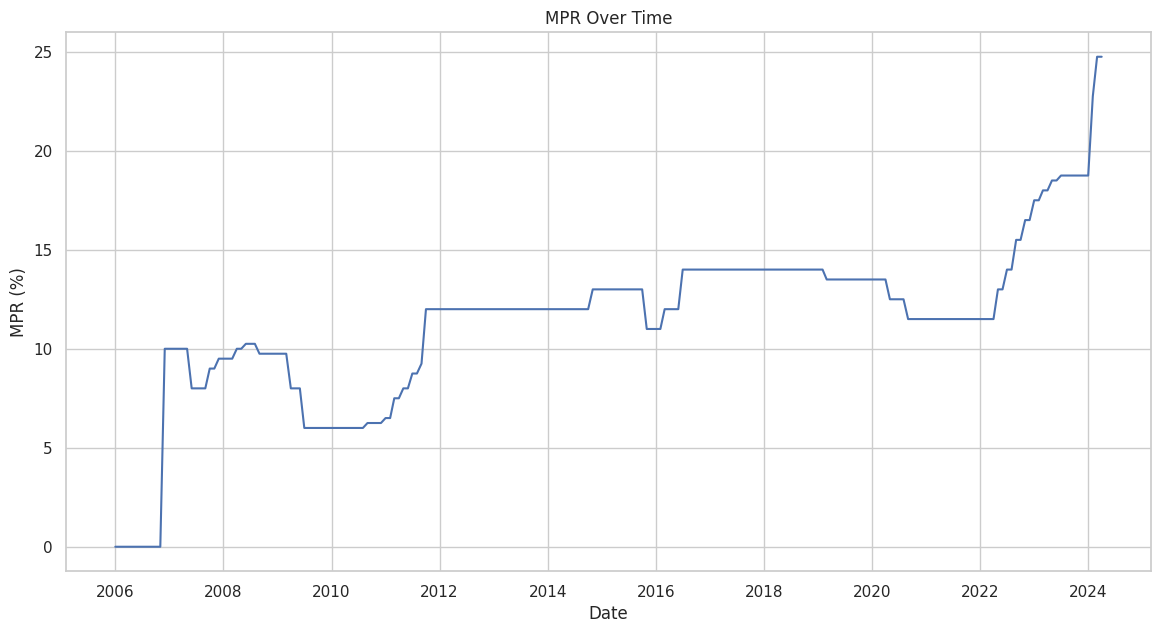

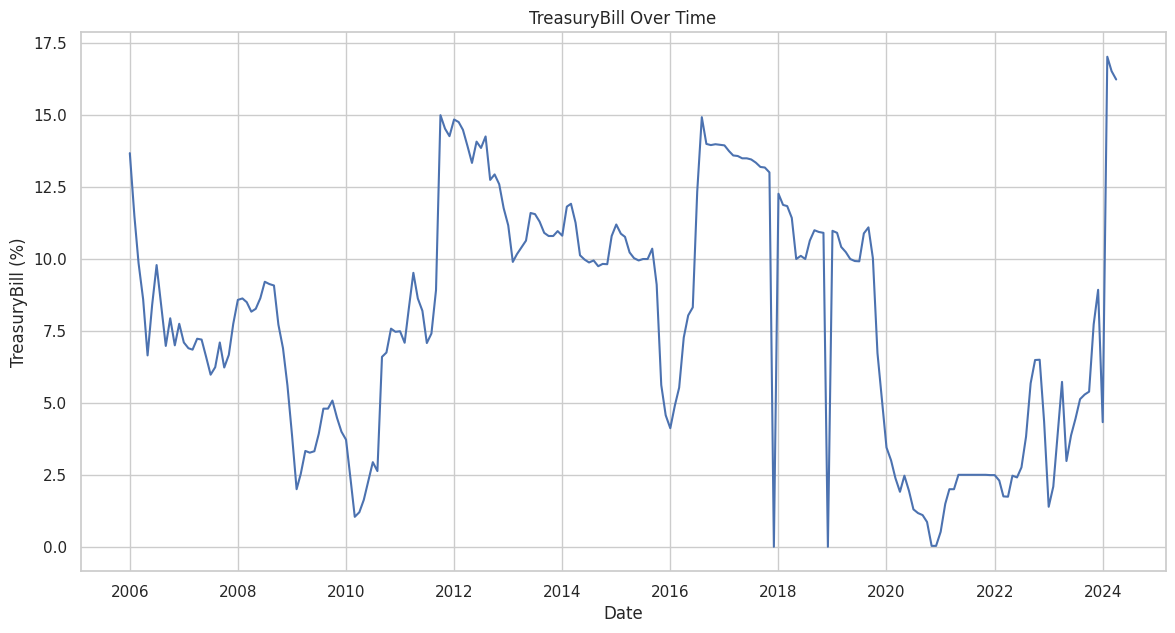

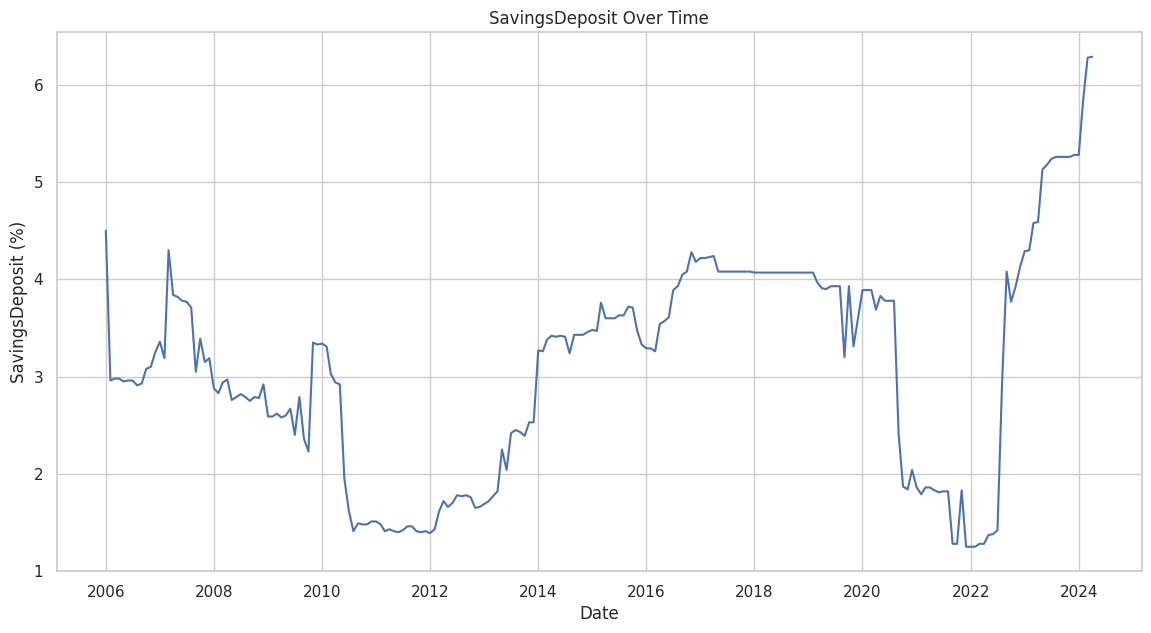

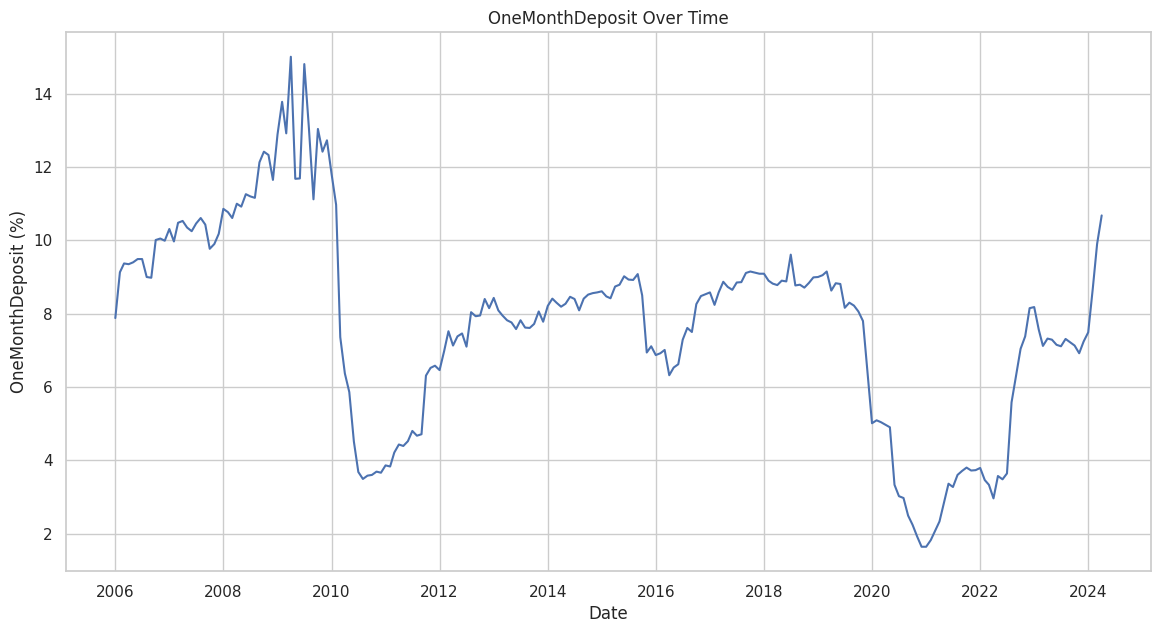

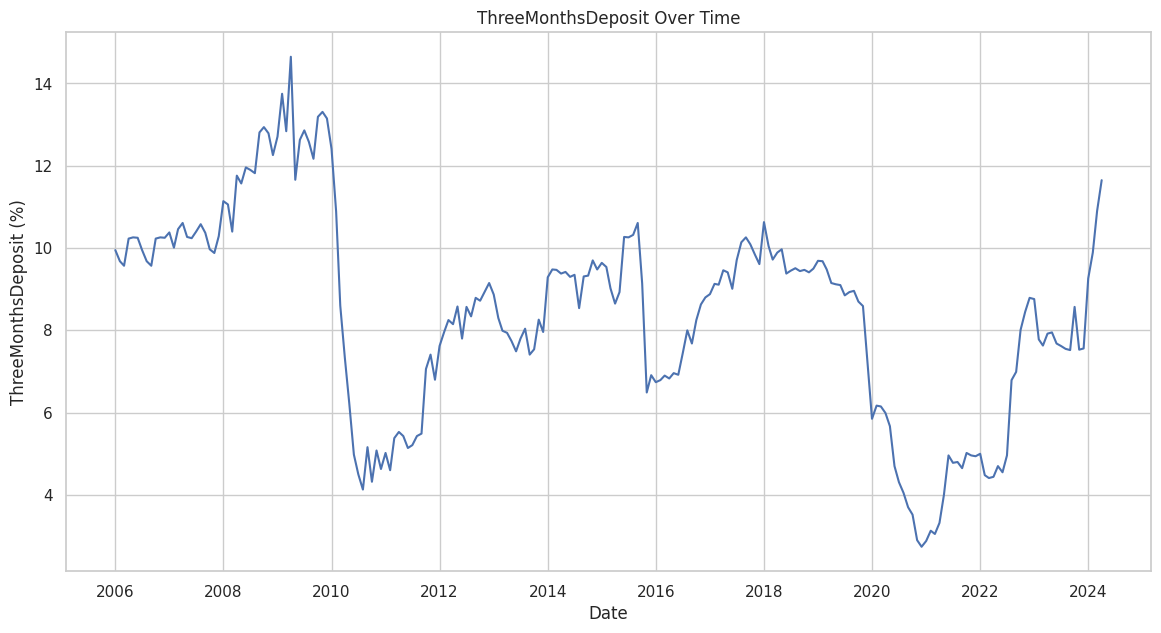

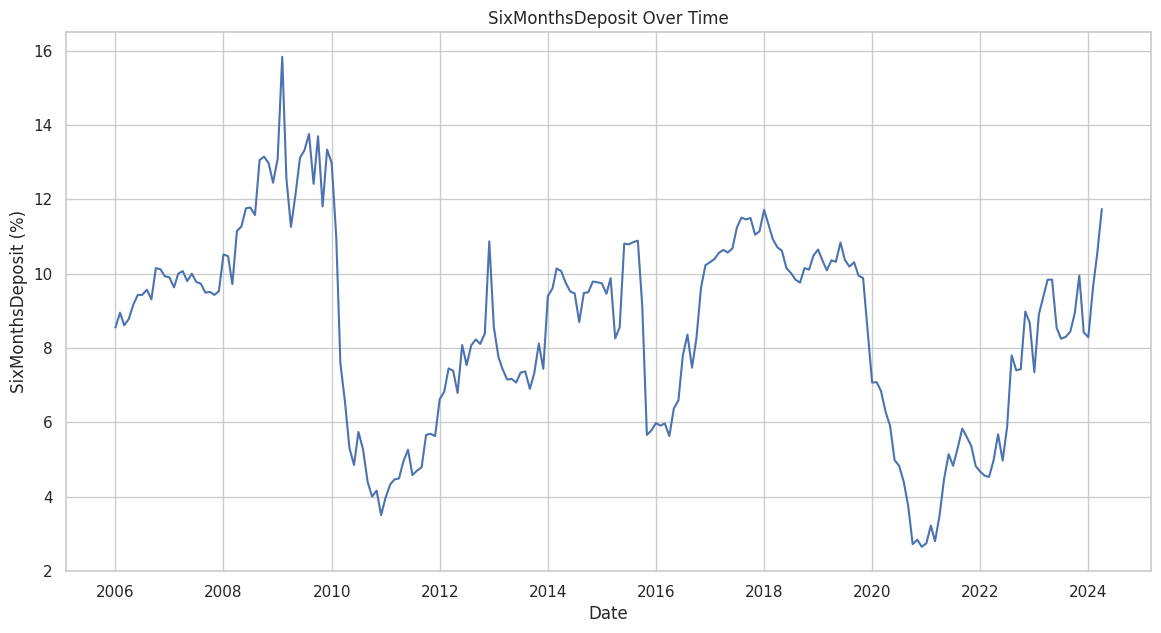

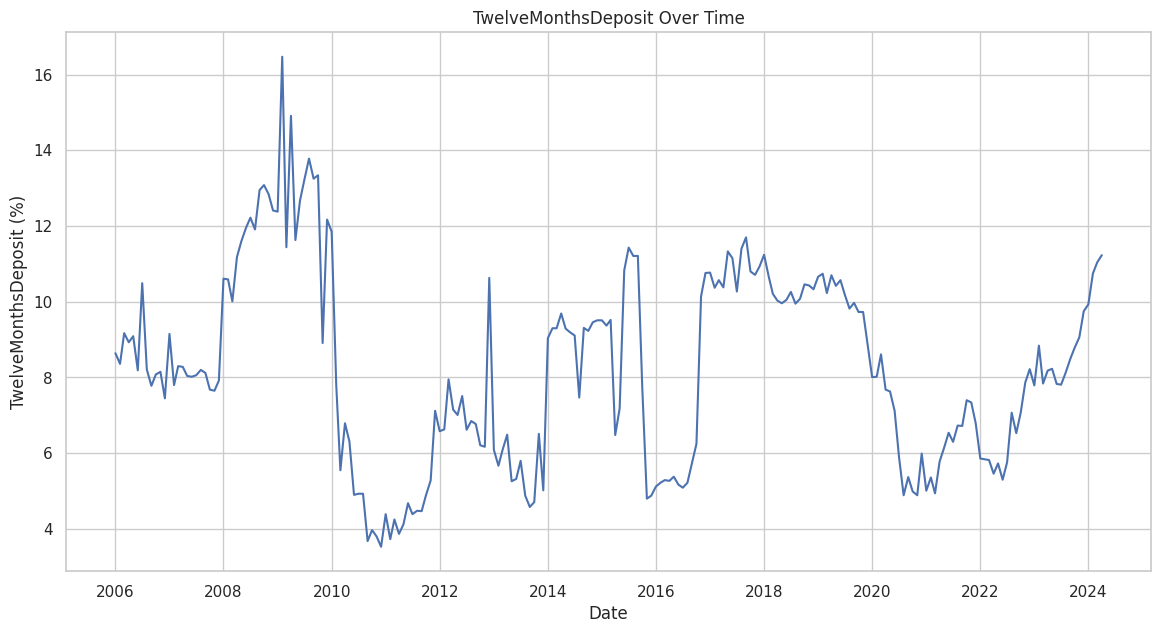

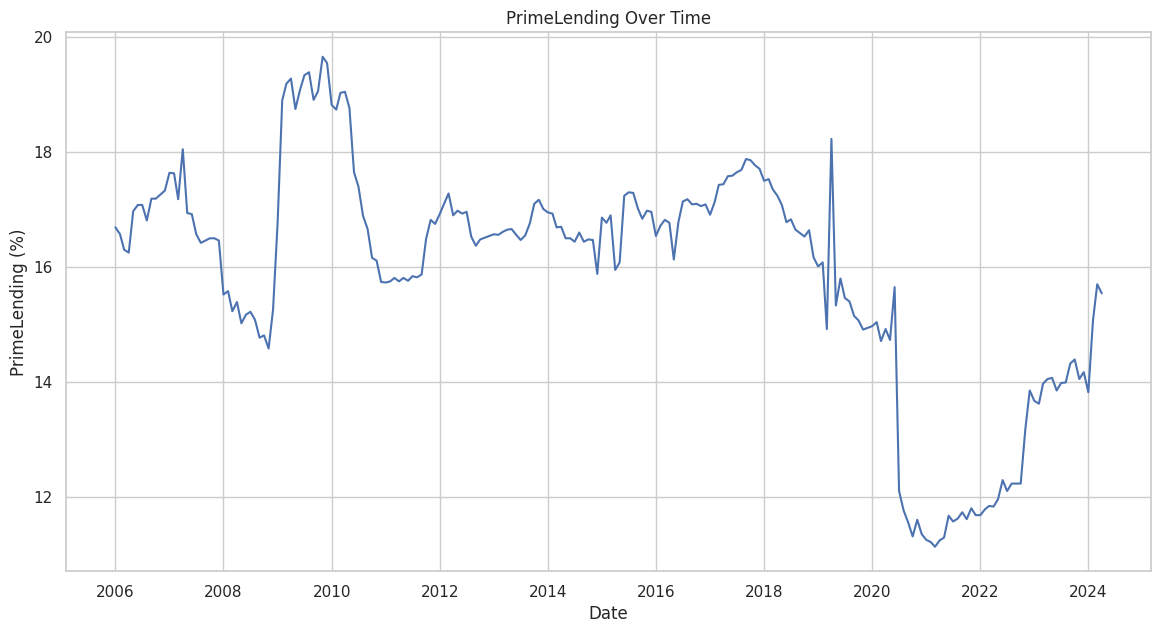

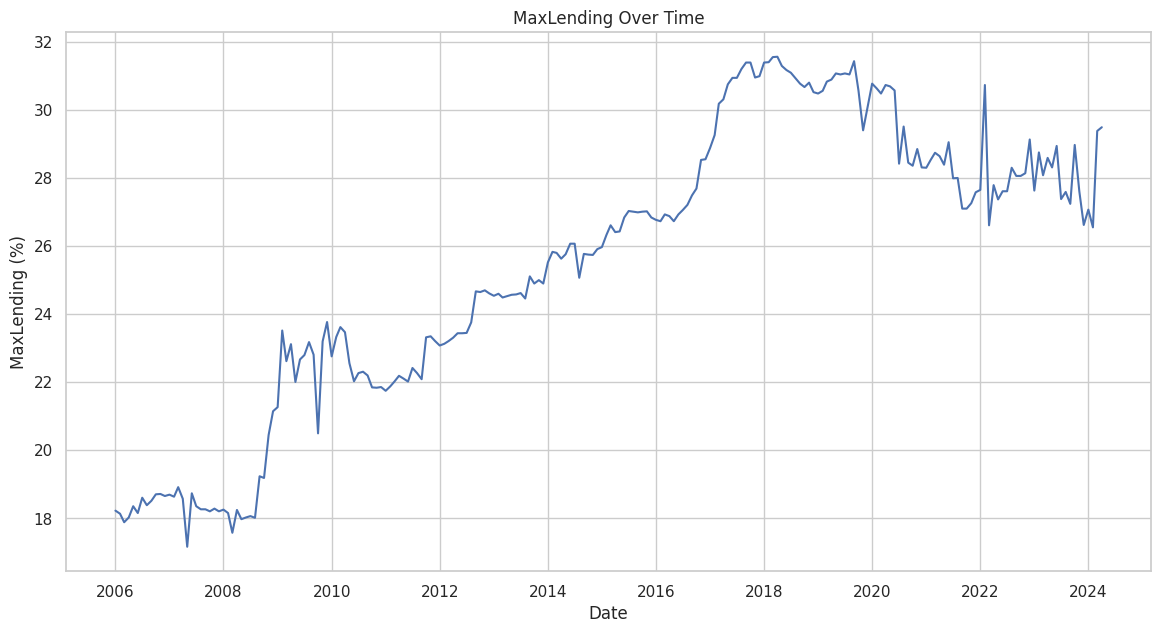

In [16]:
# Plot settings
sns.set(style="whitegrid")

# Line Chart for each financial rate
col = ['InterBankCallRate', 'MPR', 'TreasuryBill', 'SavingsDeposit', 'OneMonthDeposit',
       'ThreeMonthsDeposit', 'SixMonthsDeposit', 'TwelveMonthsDeposit', 'PrimeLending', 'MaxLending']

for i in col:
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='Date', y=i, data=data, linestyle='-')
    plt.title(i + ' Over Time')
    plt.xlabel('Date')
    plt.ylabel(i + ' (%)')
    plt.grid(True)
    plt.show()


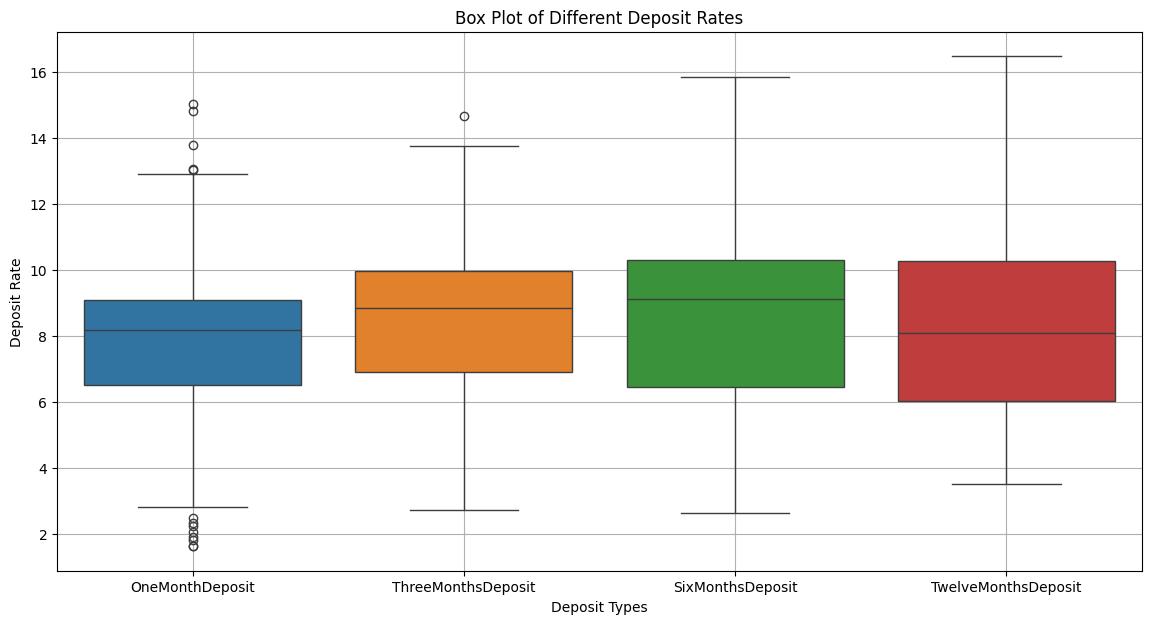

In [17]:
# Box Plot of Different Deposit Rates
plt.figure(figsize=(14, 7))
sns.boxplot(data=data[['OneMonthDeposit', 'ThreeMonthsDeposit', 'SixMonthsDeposit', 'TwelveMonthsDeposit']])
plt.title('Box Plot of Different Deposit Rates')
plt.xlabel('Deposit Types')
plt.ylabel('Deposit Rate')
plt.grid(True)
plt.show()

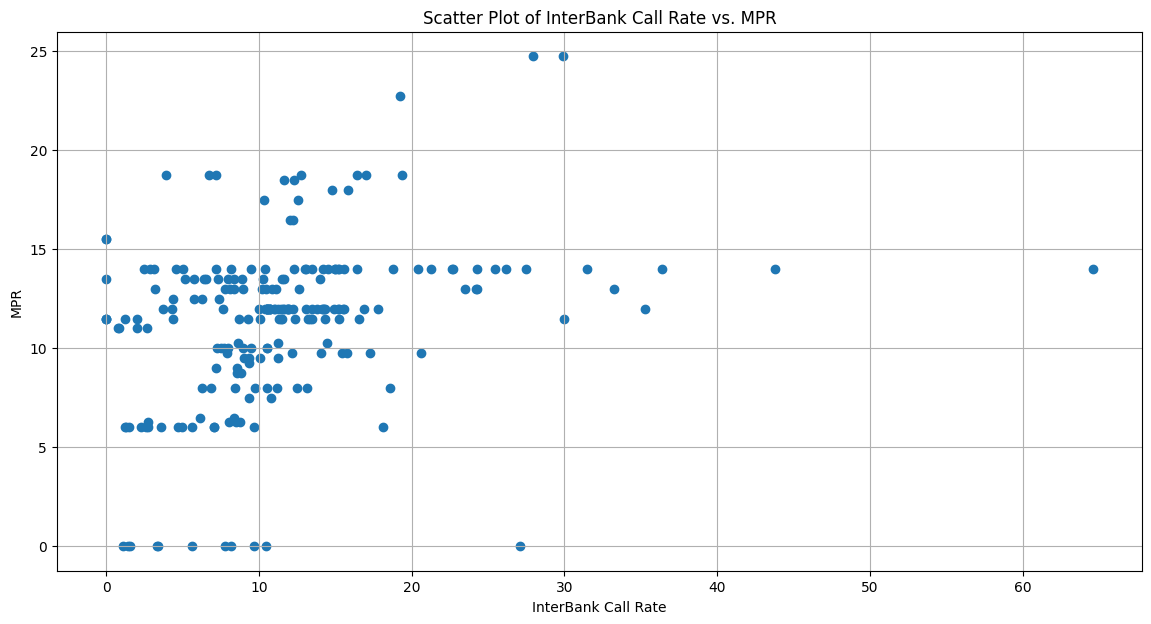

In [18]:
# Scatter Plot of InterBankCallRate vs. MPR
plt.figure(figsize=(14, 7))
plt.scatter(data['InterBankCallRate'], data['MPR'])
plt.title('Scatter Plot of InterBank Call Rate vs. MPR')
plt.xlabel('InterBank Call Rate')
plt.ylabel('MPR')
plt.grid(True)
plt.show()

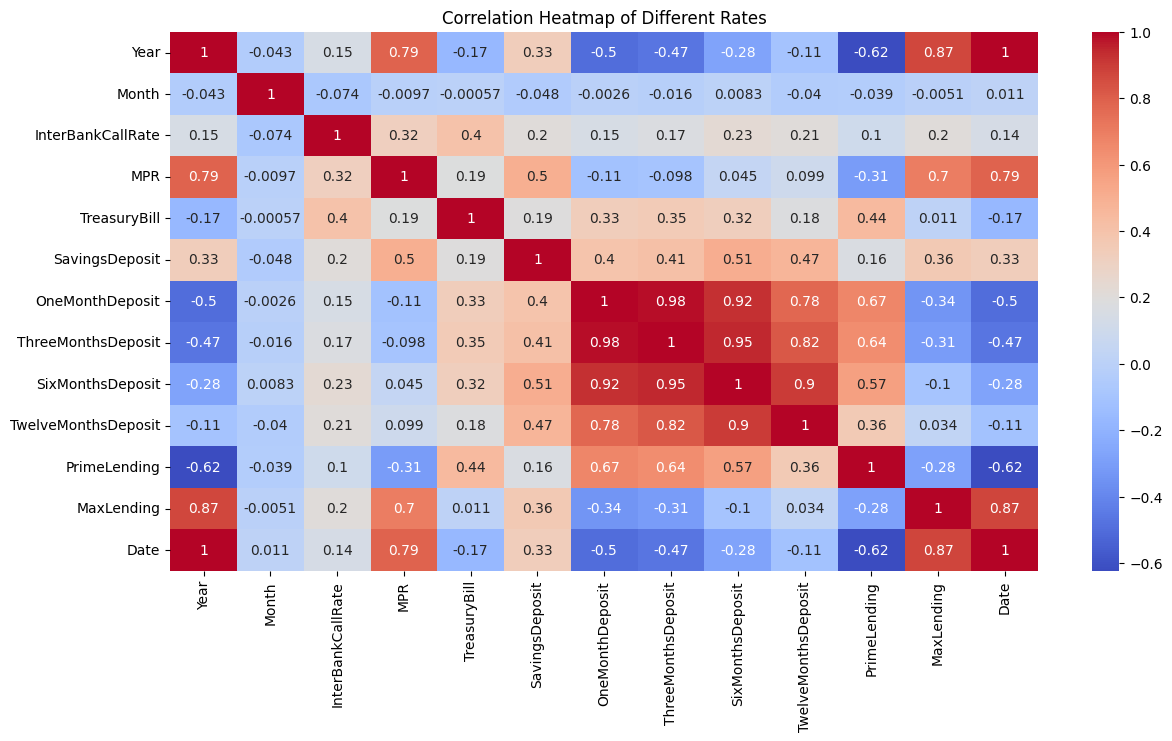

In [19]:
# Correlation Heatmap
plt.figure(figsize=(14, 7))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Different Rates')
plt.show()

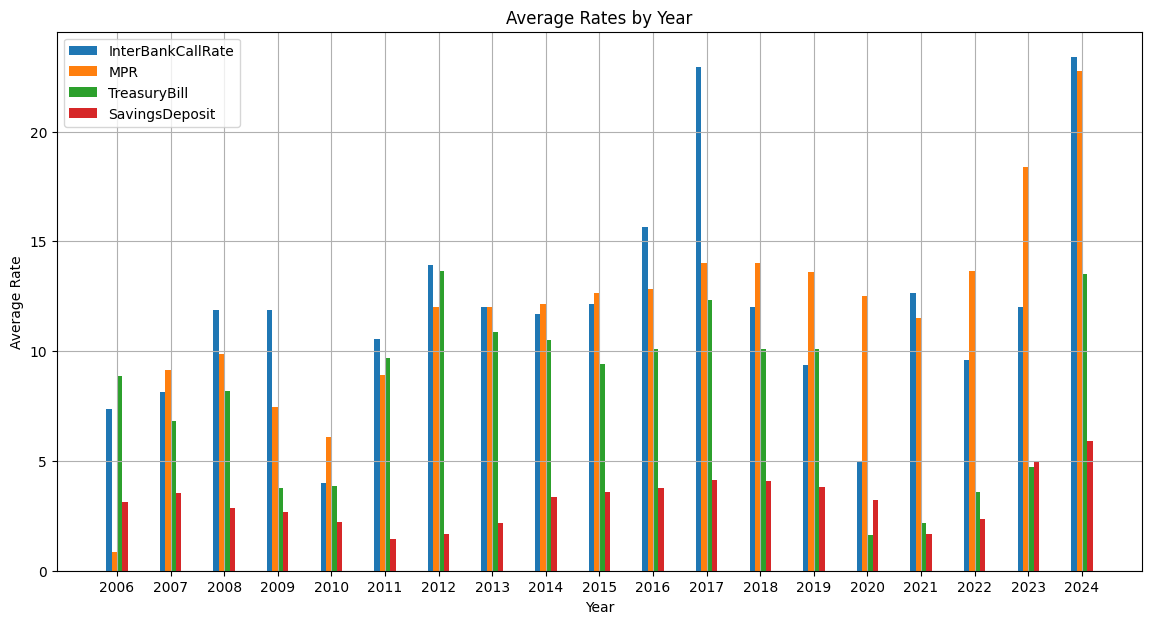

In [20]:
# Bar Plot of Average Rates by Year
average_rates_by_year = data.groupby('Year').mean().reset_index()
plt.figure(figsize=(14, 7))
bar_width = 0.1
positions = range(len(average_rates_by_year['Year']))
plt.bar(positions, average_rates_by_year['InterBankCallRate'], width=bar_width, label='InterBankCallRate')
plt.bar([p + bar_width for p in positions], average_rates_by_year['MPR'], width=bar_width, label='MPR')
plt.bar([p + bar_width*2 for p in positions], average_rates_by_year['TreasuryBill'], width=bar_width, label='TreasuryBill')
plt.bar([p + bar_width*3 for p in positions], average_rates_by_year['SavingsDeposit'], width=bar_width, label='SavingsDeposit')
plt.xlabel('Year')
plt.ylabel('Average Rate')
plt.xticks([p + bar_width*1.5 for p in positions], average_rates_by_year['Year'])
plt.title('Average Rates by Year')
plt.legend()
plt.grid(True)
plt.show()

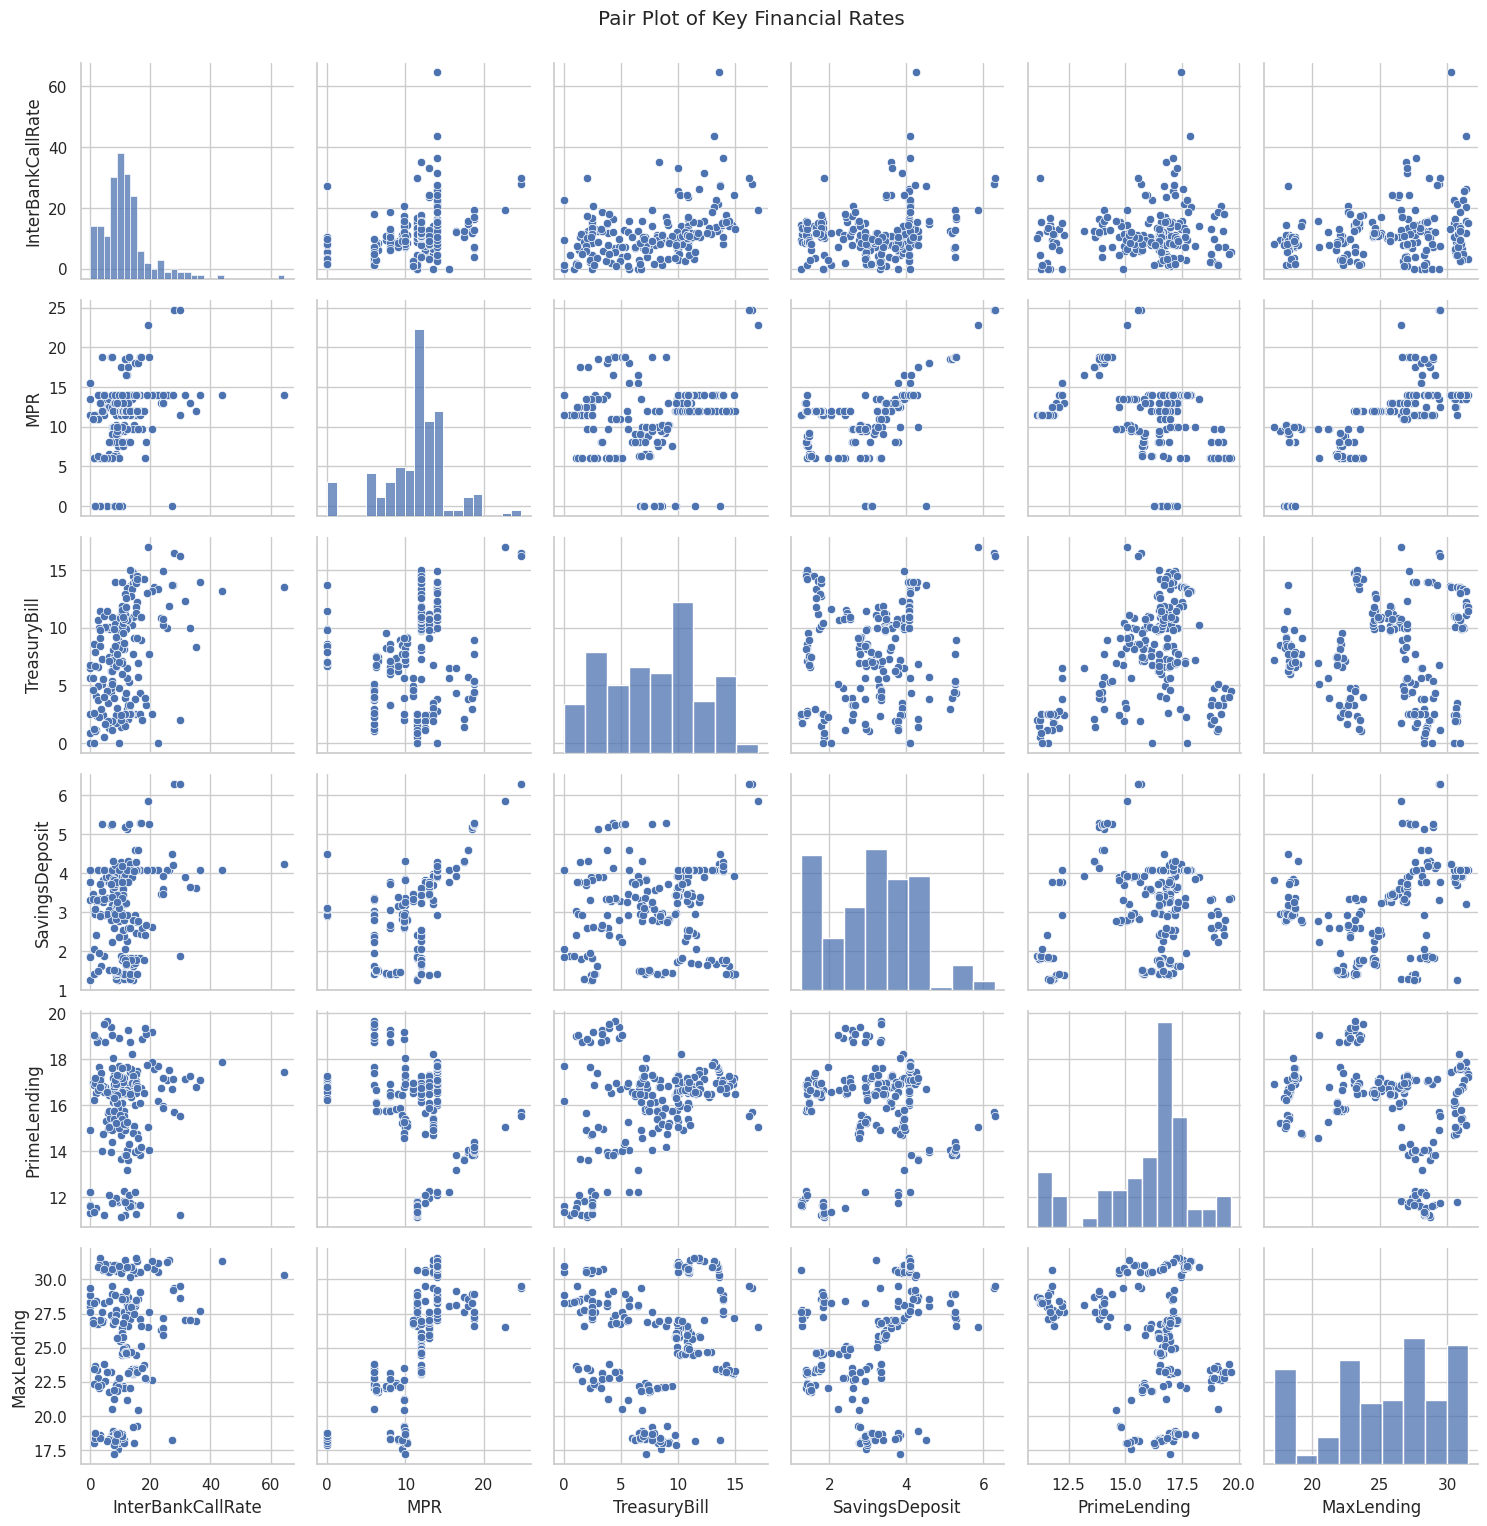

In [17]:
sns.set(style="whitegrid")

# Pair Plot: Relationships between selected key financial rates
selected_columns = ['InterBankCallRate', 'MPR', 'TreasuryBill', 'SavingsDeposit', 'PrimeLending', 'MaxLending']
pairplot = sns.pairplot(data[selected_columns])
pairplot.fig.suptitle('Pair Plot of Key Financial Rates', y=1.02)  # Adjust title position
plt.show()